# Machine Learning: Overview

* Fundamentally, machine learning involves building mathematical models to help understand data.
* "Learning" enters the fray when we give these models _tunable parameters_ that can be adapted to observed data; in this way the program can be considered to be "learning from the data.
* Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

# Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

## Supervised learning

It involves,
* Somehow modeling the relationship between measured features of data and some labels associated with the data;
* Once this model is determined, it can be used to apply labels to new, unknown data.

It is further subdivided into:
* _classification tasks_: the labels are discrete categories. For example, SVM.
* _regression tasks_: the labels are continuous. For example, linear regression.

## Unsupervised learning

It involves,
* Modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself".

These models include tasks such as
* _clustering_: They are used to identify distinct groups of data. For example, k-means
* _dimensionality reduction_: They are used to search for more succinct reoresentation of the data.

In addition, there are so-called _semi-supervised learning_ methods, which falls somewhere between supervised learning and unsupervised learning. They are often useful when only incomplete labels are avialable.

## Classification: Predicting discrete labels

We will first take a look at a simple classification task, in which we are given a set of labeled points and want to use there to classify some unlabeled points.

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [28]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2, 
                  random_state=0, cluster_std=0.80)
X2 = X2[50:]


# predict the labels
y2 = clf.predict(X2)

Imagine that we have the data shown in this figure:

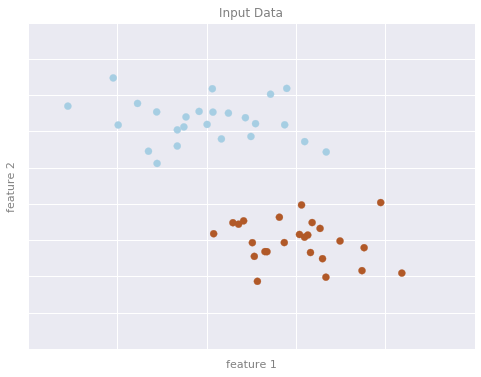

In [30]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7]);

Here we have two-dimensional data: that is, we have two _features_ for each point, represented by the (x,y) positions of the points on the plane. In addition, we have one of two class labels for each point, here represented by the colors of the points. From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but here we will use an extremely simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line fall in the same group. Here the model is a quantitative version of the statement "a straight line separates the classes", while the model parameters are the particular numbers describing the location and orientation of that line for our data. The optimal values for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called training the model.

The following figure shows a visual representation of what the trained model looks like for this data:

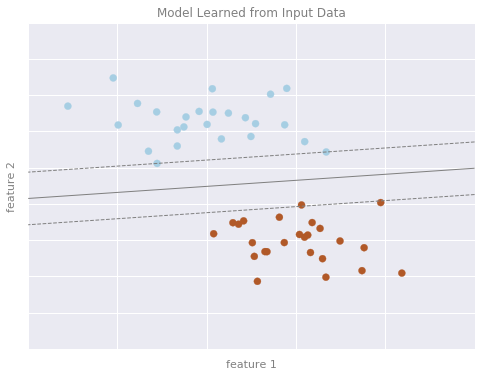

In [45]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
            for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7]);

Now that this model has been trained, it can be generalized to new, unlabeled data. In other words, we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model. This stage is usually called prediction. See the following figure:

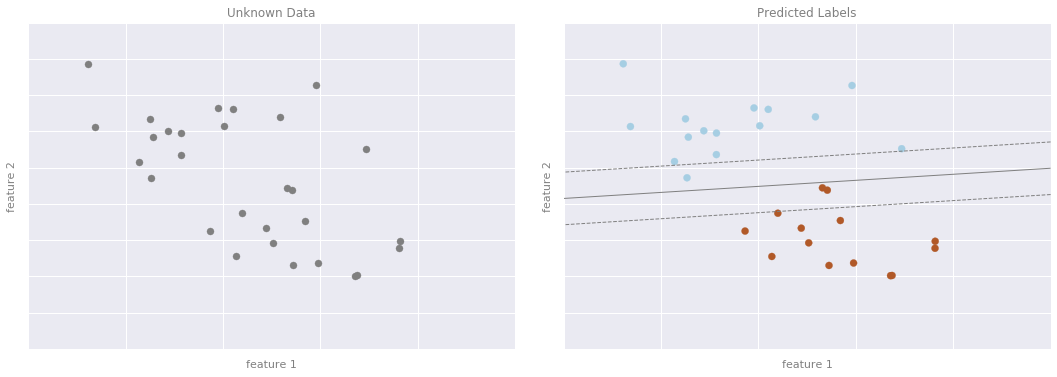

In [46]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels');



This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels. At first glance this may look fairly trivial: it would be relatively easy to simply look at this data and draw such a discriminatory line to accomplish this classification. A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

## Regression: Predicting continuous labels

Consider the data shown in the following figure, which consists of a set of points each with a continuous label:

In [47]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

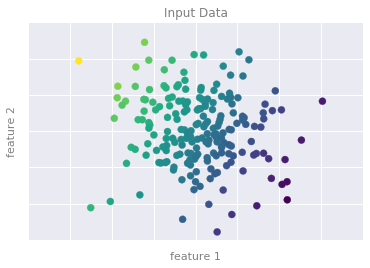

In [49]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3]);



As with the classification example, we have two-dimensional data: that is, there are two features describing each data point. The color of each point represents the continuous label for that point.

There are a number of possible regression models we might use for this type of data, but here we will use a simple linear regression to predict the points. This simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data. This is a higher-level generalization of the well-known problem of fitting a line to data with two coordinates.

We can visualize this setup as shown in the following figure:


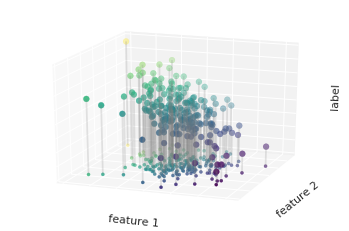

In [50]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False);

Notice that the feature 1-feature 2 plane here is the same as in the two-dimensional plot from before; in this case, however, we have represented the labels by both color and three-dimensional axis position. From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters. Returning to the two-dimensional projection, when we fit such a plane we get the result shown in the following figure:

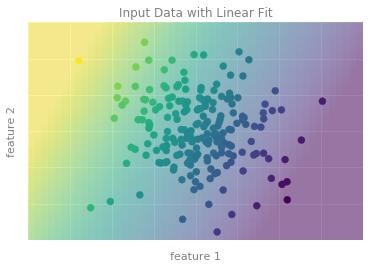

In [51]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3]);

This plane of fit gives us what we need to predict labels for new points. Visually, we find the results shown in the following figure:

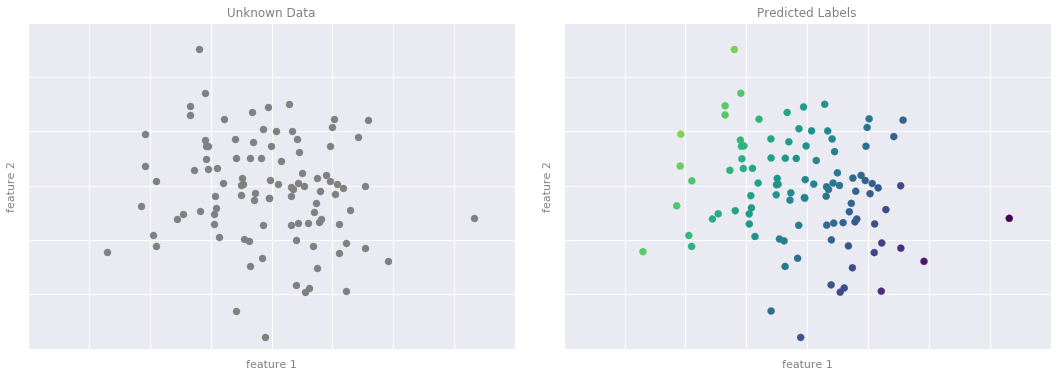

In [52]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels');

## Clustering: Inferring labels on unlabeled data

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data. Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups. For example, we might have some two-dimensional data like that shown in the following figure:

In [56]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

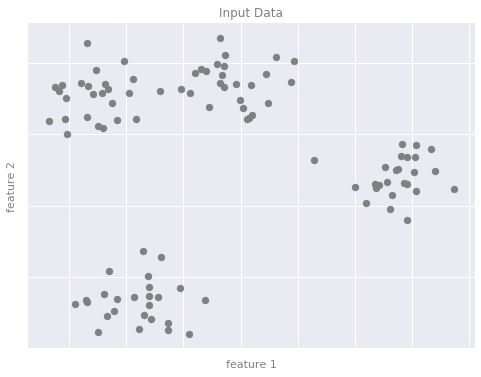

In [57]:
# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data');

By eye, it is clear that each of these points is part of a distinct group. Given this input, a clustering model will use the intrinsic structure of the data to determine which points are related. Using K-Means we get below:

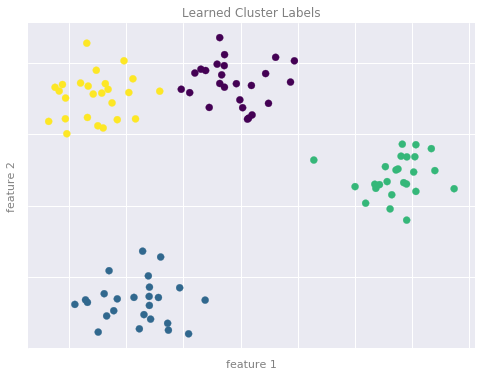

In [58]:
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels');

## Dimensionality reduction: Inferring structure of unlabeled data

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself. Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset. Different dimensionality reduction routines measure these relevant qualities in different ways.

As an example of this, consider the data shown in the following figure:

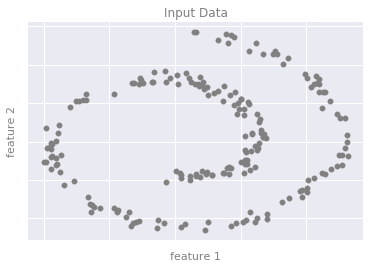

In [59]:
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax, 'Input Data');



Visually, it is clear that there is some structure in this data: it is drawn from a one-dimensional line that is arranged in a spiral within this two-dimensional space. In a sense, you could say that this data is "intrinsically" only one dimensional, though this one-dimensional data is embedded in higher-dimensional space. A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure, and be able to pull out this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this:


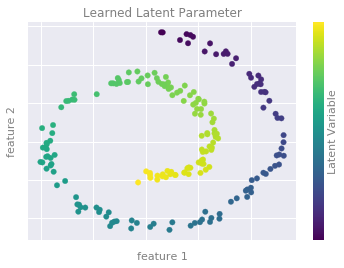

In [60]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray');

Notice that the colors (which represent the extracted one-dimensional latent variable) change uniformly along the spiral, which indicates that the algorithm did in fact detect the structure we saw by eye. As with the previous examples, the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases. For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features. Visualizing 1,000-dimensional data is a challenge, and one way we can make this more manageable is to use a dimensionality reduction technique to reduce the data to two or three dimensions.